In [1]:
#Application: Exploring Hand-written Digits
Dữ liệu hình ảnh là một mảng ba chiều: 1.797 mẫu, 
#mỗi mẫu bao gồm một lưới 8 × 8 pixel. Hãy hình dung hàng trăm đầu tiên trong số này:

from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

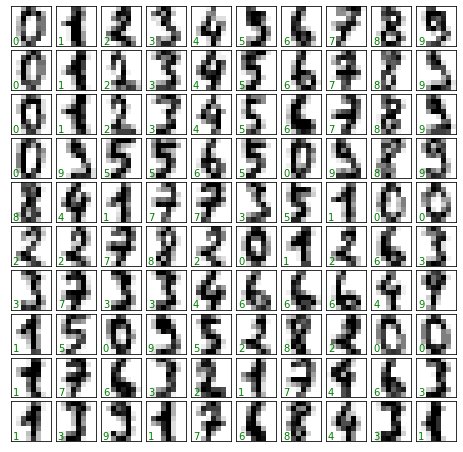

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')
#Để làm việc với dữ liệu này trong Scikit-Learn, 
#chúng tôi cần biểu diễn [n_samples, n_features] hai chiều. 
#Chúng ta có thể thực hiện điều này bằng cách coi mỗi pixel trong hình ảnh như một đặc điểm: 
#nghĩa là bằng cách làm phẳng các mảng pixel để chúng ta có một mảng dài 64 giá trị pixel đại diện cho mỗi chữ số. 
#Ngoài ra, chúng ta cần mảng đích, cung cấp nhãn đã xác định trước đó cho mỗi chữ số. 
#Hai đại lượng này được xây dựng trong tập dữ liệu chữ số theo các thuộc tính dữ liệu và mục tiêu, tương ứng:

In [3]:
X = digits.data
X.shape

(1797, 64)

In [4]:
y = digits.target
y.shape

(1797,)

In [5]:
#Unsupervised learning: Dimensionality reduction
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

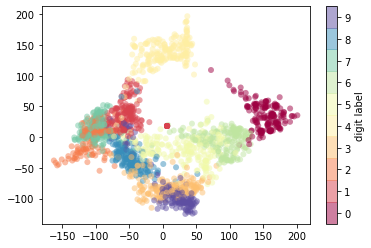

In [26]:

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('Spectral',10)
            )
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)


In [27]:
#Biểu đồ này cho chúng ta một số trực giác tốt về cách các số khác nhau được phân tách trong không gian 64 chiều lớn hơn. 
#Ví dụ, số không (màu đen) và số không (màu tím) có rất ít trùng lặp trong không gian tham số.
#Về mặt trực quan, điều này có ý nghĩa: 
#một số 0 trống ở giữa hình ảnh, trong khi một số thường sẽ có mực ở giữa. 
#Mặt khác, dường như có một phổ liên tục ít nhiều giữa cá và bốn chân: chúng ta có thể hiểu điều này bằng cách nhận ra rằng 
#một số người vẽ những hình có "mũ" trên chúng, khiến chúng trông giống với bốn cái.

#Tuy nhiên, về tổng thể, các nhóm khác nhau dường như được phân tách khá rõ ràng trong không gian tham số: 
#điều này cho chúng ta biết rằng ngay cả một thuật toán phân loại được giám sát rất đơn giản cũng phải 
#hoạt động phù hợp trên dữ liệu này. Thử một lần đi.

In [32]:
#Classification on digits
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [33]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)       

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

In [ ]:

#Với độ chính xác lên đến 97%, 
#chúng tôi thấy rằng ngay cả thuật toán phân loại rất ngây thơ này cũng có hiệu quả đối với tập dữ liệu cụ thể này!

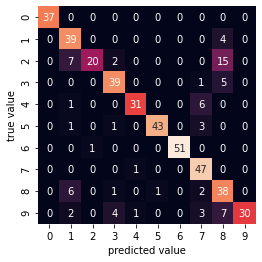

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [38]:
#Điều này cho chúng ta thấy các điểm được dán nhãn sai có xu hướng ở đâu: 
#ví dụ: một số lượng lớn các điểm hai ở đây được phân loại sai thành một hoặc tám. 
#Một cách khác để có được trực giác về các đặc điểm của mô hình là vẽ lại các đầu vào,
#với các nhãn dự đoán của chúng. 
#Chúng tôi sẽ sử dụng màu xanh lá cây cho các nhãn chính xác và màu đỏ cho các nhãn không chính xác:

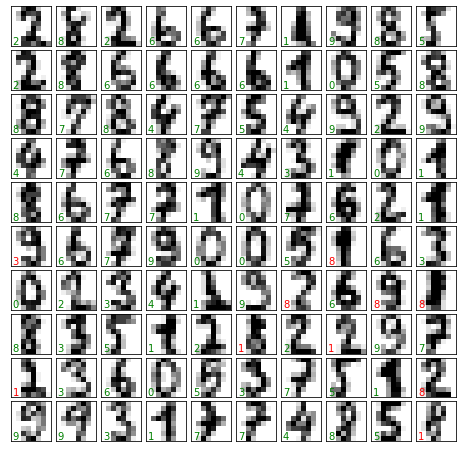

In [39]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')